In [ ]:
!nvidia-smi

Wed Apr 19 20:26:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 13.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.2 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

model_id = "stabilityai/stable-diffusion-2-1"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
prompt = "8k sorceress girl, in a long dress, a brown-hair, controls water, with magic, with brown eyes, cute mouth, cute face"
num_cols = 2
num_rows = 2

prompt = ["8k sorceress girl, in a long dress, a brown-hair, controls water, with magic, with brown eyes, cute mouth, cute face"] * num_cols

all_images = []
for i in range(num_rows):
  images = pipe(prompt).images
  all_images.extend(images)

grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid

  0%|          | 0/50 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 8>:9                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/utils/_contextlib.py:115 in decorate_context        │
│                                                                                                  │
│   112 │   @functools.wraps(func)                                                                 │
│   113 │   def decorate_context(*args, **kwargs):                                                 │
│   114 │   │   with ctx_factory():                                                                │
│ ❱ 115 │   │   │   return func(*args, **kwargs)                                                   │
│   116 │                                                                                          │
│   117 │   return decorate_context                                                                │
│   118                                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diff │
│ usion.py:529 in __call__                                                                         │
│                                                                                                  │
│   526 │   │   │   │   latent_model_input = self.scheduler.scale_model_input(latent_model_input   │
│   527 │   │   │   │                                                                              │
│   528 │   │   │   │   # predict the noise residual                                               │
│ ❱ 529 │   │   │   │   noise_pred = self.unet(latent_model_input, t, encoder_hidden_states=text   │
│   530 │   │   │   │                                                                              │
│   531 │   │   │   │   # perform guidance                                                         │
│   532 │   │   │   │   if do_classifier_free_guidance:                                            │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/torch/nn/modules/module.py:1501 in _call_impl             │
│                                                                                                  │
│   1498 │   │   if not (self._backward_hooks or self._backward_pre_hooks or self._forward_hooks   │
│   1499 │   │   │   │   or _global_backward_pre_hooks or _global_backward_hooks                   │
│   1500 │   │   │   │   or _global_forward_hooks or _global_forward_pre_hooks):                   │
│ ❱ 1501 │   │   │   return forward_call(*args, **kwargs)                                          │
│   1502 │   │   # Do not call functions when jit is used                                          │
│   1503 │   │   full_backward_hooks, non_full_backward_hooks = [], []                             │
│   1504 │   │   backward_pre_hooks = []                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.9/dist-packages/diffusers/models/unet_2d_condition.py:424 in forward      │
│                                                                                                  │
│   421 │   │   down_block_res_samples = (sample,)                                                 │
│   422 │   │   for downsample_block in self.down_blocks:                                          │
│   423 │   │   │   if hasattr(downsample_block, "has_cross_attention") and downsample_block.has   │
│ ❱ 424 │   │   │   │   sample, res_samples = downsample_bloc

In [ ]:
# ЗАДАНИЕ 1
import pandas as pd
indexes =[6, 13, 33]
data = pd.read_csv("./data-1682946953543.csv")
for i in indexes:
  print(i, data["salary"].iloc[i-1])
print("mean", data["salary"].mean())
print("median", data["salary"].median())

6 25960
13 26999
33 30820
mean 38658.03614457831
median 32473.0


1 -2.4927954273871675
2 -34.21521225471356
[0.36317133 0.60664362 0.83974943 0.94179255 0.99572707 0.99689678
 0.99801701 0.99881146 0.99941171 1.        ]


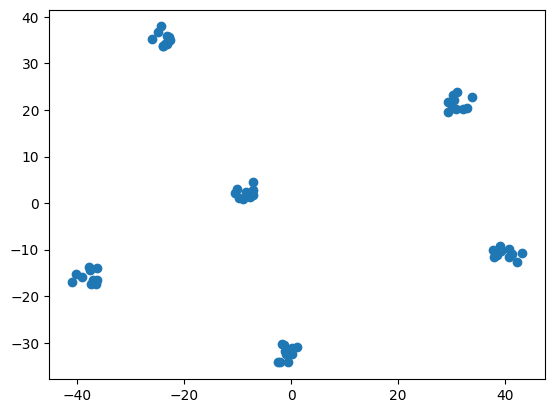

PART 2 =======================================================


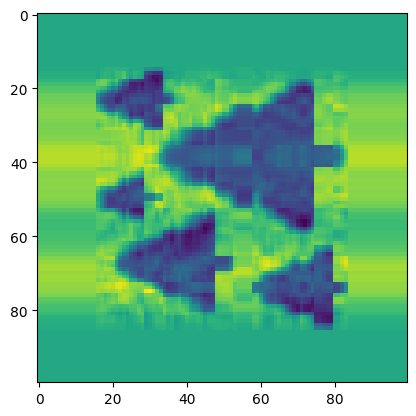

In [ ]:
#Задание 2.1
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data = np.array(pd.read_csv("./13_36.csv", names = [str(i) for i in range(10)]), dtype = np.float64)
model = PCA(n_components = 10, svd_solver = "full")
model.fit(data)
data1 = model.transform(data)
print("1", data1[0][0])
print("2", data1[0][1])
print(np.cumsum(model.explained_variance_ratio_))

plt.scatter(x = data1[:,0], y = data1[:,1])
plt.show()

print("PART 2 =======================================================")
# z = pd.read_csv("./X_loadings_492.csv", sep=";")
# z.head(2)
z = np.array(pd.read_csv("./X_loadings_492.csv", sep=";", names = [str(i) for i in range(10)]), dtype = np.float64)
ф = np.array(pd.read_csv("./X_reduced_492.csv", sep=";", names = [str(i) for i in range(10)]), dtype = np.float64)

plt.imshow(np.dot(z,ф.T))

In [ ]:
#Задание 2.2
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
data = np.array([
[1,10,17],
[2,13,21],
[3,11,23],
[4,12,39],
[5,17,31],
[6,7,15],
[7,16,49],
[8,1,2],
[9,8,19],
[10,9,22]
])

x, y = data[:, 1], data[:,2]
x = x[:, np.newaxis]
print("X_mean", np.mean(x, axis=0))
print("Y_mean", np.mean(y))

model = LinearRegression()
model.fit(x, y)

theta1 = model.coef_[0]
theta0 = model.intercept_

print("Theta1:", theta1)
print("Theta0:", theta0)
print("r**2", r2_score(y, model.predict(x)))

print("PART 2 !!!!======================================================")
data = pd.read_csv("./candy-data.csv")

data_train = data[(data["competitorname"]!= "Runts") & (data["competitorname"]!="Starburst")]

to_pred = data.columns[1:-2] 
x = data_train[to_pred]
y = data_train["winpercent"]
model = LinearRegression()
model.fit(np.array(x), np.array(y))

print("1 конфета", model.predict(np.array(data[data["competitorname"] == "Runts"][to_pred])))
print("2 конфета", model.predict(np.array(data[data["competitorname"] == "Starburst"][to_pred])))
params = [1, 1, 1, 1, 0, 1, 0, 1, 1, 0.91, 0.751]
print("По параметрам", model.predict([params]))
# data.head(5)

X_mean [10.4]
Y_mean 23.8
Theta1: 2.3742203742203736
Theta0: -0.8918918918918841
r**2 0.6989841885433534
PART 2 !!!!======================================================
1 конфета [43.22457296]
2 конфета [41.3443621]
По параметрам [81.88984516]


In [13]:
#задание 3.1
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
data = np.array(
[[1,22,86,0],
[2,78,32,1
],[3,54,50,1
],[4,68,80,0
],[5,18,12,0
],[6,85,48,0
],[7,78,10,0
],[8,50,74,0
],[9,30,95,0
],[10,91,12,0]]
)

clf = KNeighborsClassifier(n_neighbors=3, p=1)
clf.fit(data[:, 1:3], data[:,3])
point = [30,30]
print(clf.kneighbors([point])[0])
print(clf.kneighbors([point])[1]+1)

[[30. 44. 50.]]
[[5 3 2]]


In [18]:
#задание 3.2 
import numpy as np
words_count = 10
all_spam_words = 87
all_not_spam_words = 105
not_dict_words = 2
start_p = 17/37
def calk_P(this_spam:int, this_not_spam:int):
    return [((this_spam + not_dict_words) / (all_spam_words + not_dict_words + words_count)), ((this_not_spam + 1) / (all_not_spam_words + not_dict_words + words_count))][0]

def calk_F():
   return start_p + calk_P(0, 0) + calk_P(3, 1) + calk_P(36, 2) + calk_P(0,0) + calk_P(26,44) + calk_P(0,0) +calk_P(1,1) 
  
def calk_allP():
    return 

print(calk_allP() )

3.939637932303462e-11


In [82]:
#Задание 3.3
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
data = pd.read_csv("./candy-data.csv")
data_test = pd.read_csv("./candy-test.csv")
cols = data.columns[1:-2]

candy_to_del = ["Nestle Butterfinger", "Ring pop", "Sixlets"]
pred_data = data[~data["competitorname"].isin(candy_to_del)]

X, y = np.array(pred_data[cols]), np.array(pred_data['Y'])
clf = LogisticRegression(random_state = 2019, solver = 'lbfgs')
clf.fit(X, y)

print(clf.predict_proba(data_test.loc[data_test["competitorname"] == "Swedish Fish", cols]))

X_test, y_test = np.array(data_test[cols]), np.array(data_test["Y"])
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

y_pred1 = y_pred_proba.argmax(axis=1)
TP = np.sum((y_pred1 == y_test)*y_test)
print("Pres: ", TP / (TP + np.sum((y_pred1==True) * (y_test == 0))))
print("Rec: ", TP / (TP + np.sum((y_pred1==False) * (y_test == 1))))
print(confusion_matrix(y_test, y_pred1))

print("AUC: ", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

[[0.62020159 0.37979841]]
Pres:  0.5
Rec:  0.6
[[7 3]
 [2 3]]
AUC:  0.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [19]:
#4.1
import cv2
import os
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

imagePaths = sorted([f for f in os.listdir('./train')])[1:]
X = np.array([extract_histogram(cv2.imread('./train/' + i)) for i in imagePaths])
y = np.array([0 if i[0] == "c" else 1 for i in imagePaths])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.25)

clf = LinearSVC(random_state=2, C=0.94)
clf.fit(X_train, y_train)


print(clf.coef_[0,[280 - 1,129 - 1, 440 - 1]])

f1_score(y_test, clf.predict(X_test), average="macro")

imlist = ["cat.1016.jpg", "cat.1024.jpg", "dog.1006.jpg","dog.1033.jpg"]
for i in imlist:
    print(i, clf.predict([extract_histogram(cv2.imread('./test/' + i))]))

[0.20317455 0.00861652 0.        ]
cat.1016.jpg [0]
cat.1024.jpg [1]
dog.1006.jpg [1]
dog.1033.jpg [0]


In [40]:
#4.2
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd
from sklearn.metrics import f1_score


clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 10, min_samples_leaf = 10, random_state = 2020)
data2 = pd.read_csv("./diabetes.csv")
data = data2.iloc[:670]
print("1: ", data[data["Outcome"]==0].shape[0])

y =  np.array(data["Outcome"])
X = np.array(data[data.columns[:-1]])

X_train, X_test , y_train, y_test= X[: int(X.shape[0]*0.8)], X[int(X.shape[0]*0.8) :], y[: int(y.shape[0]*0.8)], y[int(y.shape[0]*0.8) :]

clf.fit(X_train, y_train)
print("deep:", clf.get_depth())
print("acc:", np.sum(clf.predict(X_test) == y_test)/len(y_test))
print("f1: ", f1_score(y_test, clf.predict(X_test), average="macro"))
print(clf.predict(data2.loc[[712, 749, 703, 740], data2.columns[:-1]]))

columns = list(data.columns[:-1])
export_graphviz(clf, out_file='./tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

# with open('./tree.dot', "r") as f:
#     dot_graph = f.read()

# graphviz.Source(dot_graph)

1:  439
deep: 6
acc: 0.8208955223880597
f1:  0.775982167734745
[0 1 0 1]


d:\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [53]:
#5
from sklearn.cluster import KMeans
data = np.array([[1, 6, 10, 0],
[2, 17, 5, 1],
[3, 17, 4, 2],
[4, 17, 16, 1],
[5, 11, 4, 2],
[6, 14, 6, 2],
[7, 15, 12, 0],
[8, 1, 1, 2],
[9, 3, 4, 0],
[10, 10, 17, 1],
[11, 6, 19, 2],
[12, 18, 12, 0],
[13, 10, 16, 0],
[14, 9, 3, 2],
[15, 12, 14, 2]])
clast = KMeans(n_clusters=3, init=np.array([[10.4, 10.8], [14.67, 12.67], [10.0, 7.29]]), max_iter=100, n_init=1)
clast.fit(data[:,1:3])
print(clast.predict(data[:,1:3]))
claster = 0
np.mean(np.sum((data[clast.predict(data[:,1:3]) == claster][:, 1:3] - clast.cluster_centers_[claster])**2,axis=1)**0.5)

[0 2 2 1 2 2 1 2 2 0 0 1 0 2 1]
3.400367627183861


d:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3.6112579105794795

In [65]:
#6
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

imagePaths = sorted([f for f in os.listdir('./train')])[1:]
X = np.array([extract_histogram(cv2.imread('./train/' + i)) for i in imagePaths])
y = np.array([1 if i[0] == "c" else 0 for i in imagePaths])

clf = LinearSVC(C=1.32, random_state = 238)
clf.fit(X, y)
clf_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 238)
clf_tree.fit(X, y)
rand_tree = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 238)
rand_tree.fit(X, y)
clf_lin = LogisticRegression(solver='lbfgs', random_state = 238)
clf_lin.fit(X, y)
clf_tree = BaggingClassifier(clf_tree, n_estimators = 11, random_state = 238)
clf_tree.fit(X, y)
estimators = [
    ("svm", clf),
    ("tree", clf_tree),
    ("rand_tree", rand_tree),
    ("clf_lin", clf_lin)
]

# clf_lin.fit(X, y)
print(cross_val_score(clf_lin, X, y, cv=2))
clf_lin = StackingClassifier(estimators, cv=2)
clf_lin.fit(X, y)


imlist = ["cat.1015.jpg", "cat.1006.jpg", "cat.1022.jpg","dog.1007.jpg"]
for i in imlist:
    print(i, clf_lin.predict_proba([extract_histogram(cv2.imread('./test/' + i))]))


[0.584 0.592]
cat.1015.jpg [[0.45998525 0.54001475]]
cat.1006.jpg [[0.33236389 0.66763611]]
cat.1022.jpg [[0.43101855 0.56898145]]
dog.1007.jpg [[0.37257045 0.62742955]]
